In [1]:
IRdisplay::display_html("
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>")

# Análisis de Datos - Introducción

## Objetivos de la unidad
- Conocer el proceso general de adquisición de conocimiento a partir de bases de datos. 
- Comprender las diferencias entre modelamiento fenomenológico y modelamiento a partir de datos.
- Comprender los problemas de plantear hipótesis a partir de datos, sin contar con modelos fenomenológicos. 
- Comprender los problemas del compromiso sesgo-varianza y el principio de parsimonia.


## Desde 13283 a 13222

### ¿Qué aprendimos en Inferencia y Modelos Estadísticos
1. Modelamiento
2. Análisis estadístico
3. Muestreo estadístico
4. Estimación estadística
5. Decisión estadística
6. Estadística no paramétrica
7. Análisis de varianza
8. Regresión estadística


### ¿Qué significa ciencia de datos?

**Conceptos importantes**

- **Datos:** Hechos o medidas que describen característicasde objetos, eventos o personas, es la materia prima de lacual se obtendrá la información.
- **Información:** Datos procesados y presentados en formaadecuada, de interés para un observador en un tiempo determinado.
- **Conocimiento:** Información procesada para emitir juicios que llevan a conclusiones.
- **Meta-conocimiento:** Reglas  que  permiten  obtener conocimiento.


Por lo cual la ciencia de datos busca extraer conocimiento a partir de datos (masivos). En la actualidad, se asocia el término *big data*, para explicitar la abundancia, generación y variedad de datos.

### Obtención de Conocimientode Bases de Datos - *Knowledge Discovery in Database (KDD)*

> “Proceso no trivial de identificación válido, novedoso, potencialmente útil y esencialmente entendible  de obtención de **patrones** de los datos”.

En donde la obtención de patrones indica: relaciones, correlaciones, tendencias, descripción de eventos raros, etc.

1. Establecer objetivos del KDD.
2. Obtención de datos.
3. Preprocesamiento: selección de datos, limpieza de datos (filtrado), enriquecimiento y codificación.
4. Minería de datos


### ¿Qué busca el aprendizaje automático?

- Identificar grupos o anomalías
- Clasificación
- Predicción


## R como tu amigo para los datos

> R es un entorno y lenguaje de programación con un enfoque al análisis estadístico. R nació como una reimplementación de software libre del lenguaje S, adicionado con soporte para alcance estático. Se trata de uno de los lenguajes de programación más utilizados en investigación científica, siendo además muy popular en los campos de aprendizaje automático (machine learning), minería de datos, investigación biomédica, bioinformática y matemáticas financieras. A esto contribuye la posibilidad de cargar diferentes bibliotecas o paquetes con funcionalidades de cálculo y graficación. [Wikipedia](https://es.wikipedia.org/wiki/R_%28lenguaje_de_programaci%C3%B3n%29)

Para la asignatura trabajaremos con este hermoso lenguaje, por lo cual deben instalar R y RStudio (IDE).

In [2]:
columns = c("area", "perimeter", "compactness", "length", "width", "AC", "lengthGroove", "class")
url = "https://www.dl.dropboxusercontent.com/s/wrexlo5im3g5ioi/seeds_dataset.csv"
seeds = read.csv(url, header = F, sep=",", col.names = columns)
seeds$class = factor(seeds$class, levels = c(1,2,3), labels = c("Kama", "Rosa", "Canadian"))

In [3]:
head(seeds)

,area,perimeter,compactness,length,width,AC,lengthGroove,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
6,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama


In [4]:
tail(seeds)

,area,perimeter,compactness,length,width,AC,lengthGroove,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
205,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,Canadian
206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian
210,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,Canadian


In [5]:
mean(seeds$perimeter)

[1] 14.55929

In [6]:
sd(seeds$perimeter)

[1] 1.305959

In [7]:
var(seeds$perimeter)

[1] 1.705528

In [8]:
cor(seeds$width, seeds$area)

[1] 0.9707706

In [9]:
summary(seeds)

      area         perimeter      compactness         length     
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262  
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
     width             AC          lengthGroove        class   
 Min.   :2.630   Min.   :0.7651   Min.   :4.519   Kama    :70  
 1st Qu.:2.944   1st Qu.:2.5615   1st Qu.:5.045   Rosa    :70  
 Median :3.237   Median :3.5990   Median :5.223   Canadian:70  
 Mean   :3.259   Mean   :3.7002   Mean   :5.408                
 3rd Qu.:3.562   3rd Qu.:4.7687   3rd Qu.:5.877                
 Max.   :4.033   Max.   :8.4560   Max.   :6.550                

In [10]:
library(ggpubr)

Loading required package: ggplot2

Loading required package: magrittr



## Técnicas básicas 

### Regresión lineal

**Regresión** consiste en ajustar un modelo parámetrico que sea capaz de predecir $y$ dado $x$.

$$f_{\theta}: y \to x$$

Entonces tenemos que:
- $x$ variable independiente, entrada, característica, predictor
- $y$ variable dependiente, salida, respuesta, objetivo
- Tanto $x$ como $y$ son variables continuas
- $\theta$ son los parámetros del modelo.

#### ¿Cuándo se habla de regresión lineal?

- Cuando se tiene un conjunto de $M$ tuplas ($x_i$, $y_i$) $\forall i = 1, 2, 3, ... , M$
- Cuando se realiza un **ajuste** para encontrar el el valor óptimo de $\theta$ en función de los datos.
- Si $f_\theta$ es lineal l en sus parámetros se puede escribir como un sistema lineal de $M$ ecuaciones.
- Si el sistema es rectangular lo podemos resolver con Mínimos Cuadrados:

$$ min_\theta \sum^{M}_{i=1} (y_i - f_\theta (x_i))^2$$


### En la práctica:

En la práctica se maneja:

1. Hipótesis con parámetros $\theta_i$.
$$h_\theta(x) = \theta_0 + \theta_1x$$
2. Escoger $\theta_0$ y $\theta_1$ que ajuste $h_\theta(x)$lo mas cercano a $y$ para nuestro conjunto de ejemplos $(x, y)$, respecto a nuestra función de costos.

$$J_{\theta_0, \theta_1} = min_\theta \sum^{M}_{i=1} (y_i - (\theta_0 + \theta_1x_i))^2 $$

In [11]:
h_1 = function(x) { return(1.5 + 0 * x)}
h_2 = function(x) { return(0 + 0.5 * x)}
h_3 = function(x) { return(1 + 0.5 * x)}
x = c(0:6)

h = data.frame(x, 
               h_1 = h_1(x), 
               h_2 = h_2(x), 
               h_3 = h_3(x))

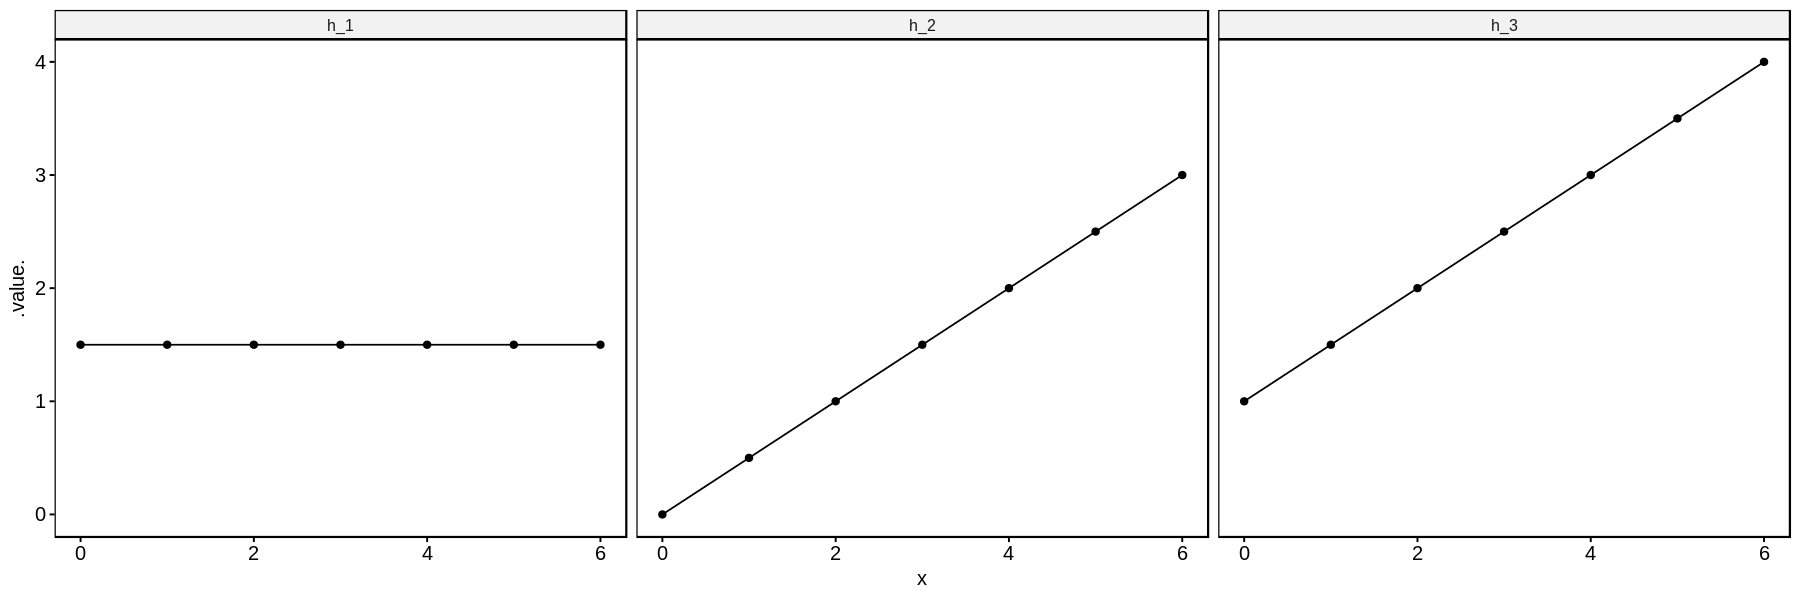

In [12]:
options(repr.plot.width=15, repr.plot.height=5)
ggline(h, 
       "x", 
       y = c("h_1", "h_2", "h_3"), 
       combine=T,  
       ylim=c(0,4),  
       xlim=c(0,6)
      )

Se tiene respectivamente:

$$h_1(x) = 1.5 + 0x$$
$$h_2(x) = 0 + 0.5x$$
$$h_3(x) = 1 + 0.5x$$

## Ejemplo: 

Si queremos buscar de que valor será el **área** de nuestras semillas con respecto al **ancho**, tendríamos que:

- Las $M$ tuplas: 210
- Identificar variable de entrada ($x$): ancho.
- Identificar variable de salida ($y$): área.
- Encontrar la recta que se ajuste a nuestros datos a partir $h(\theta)$


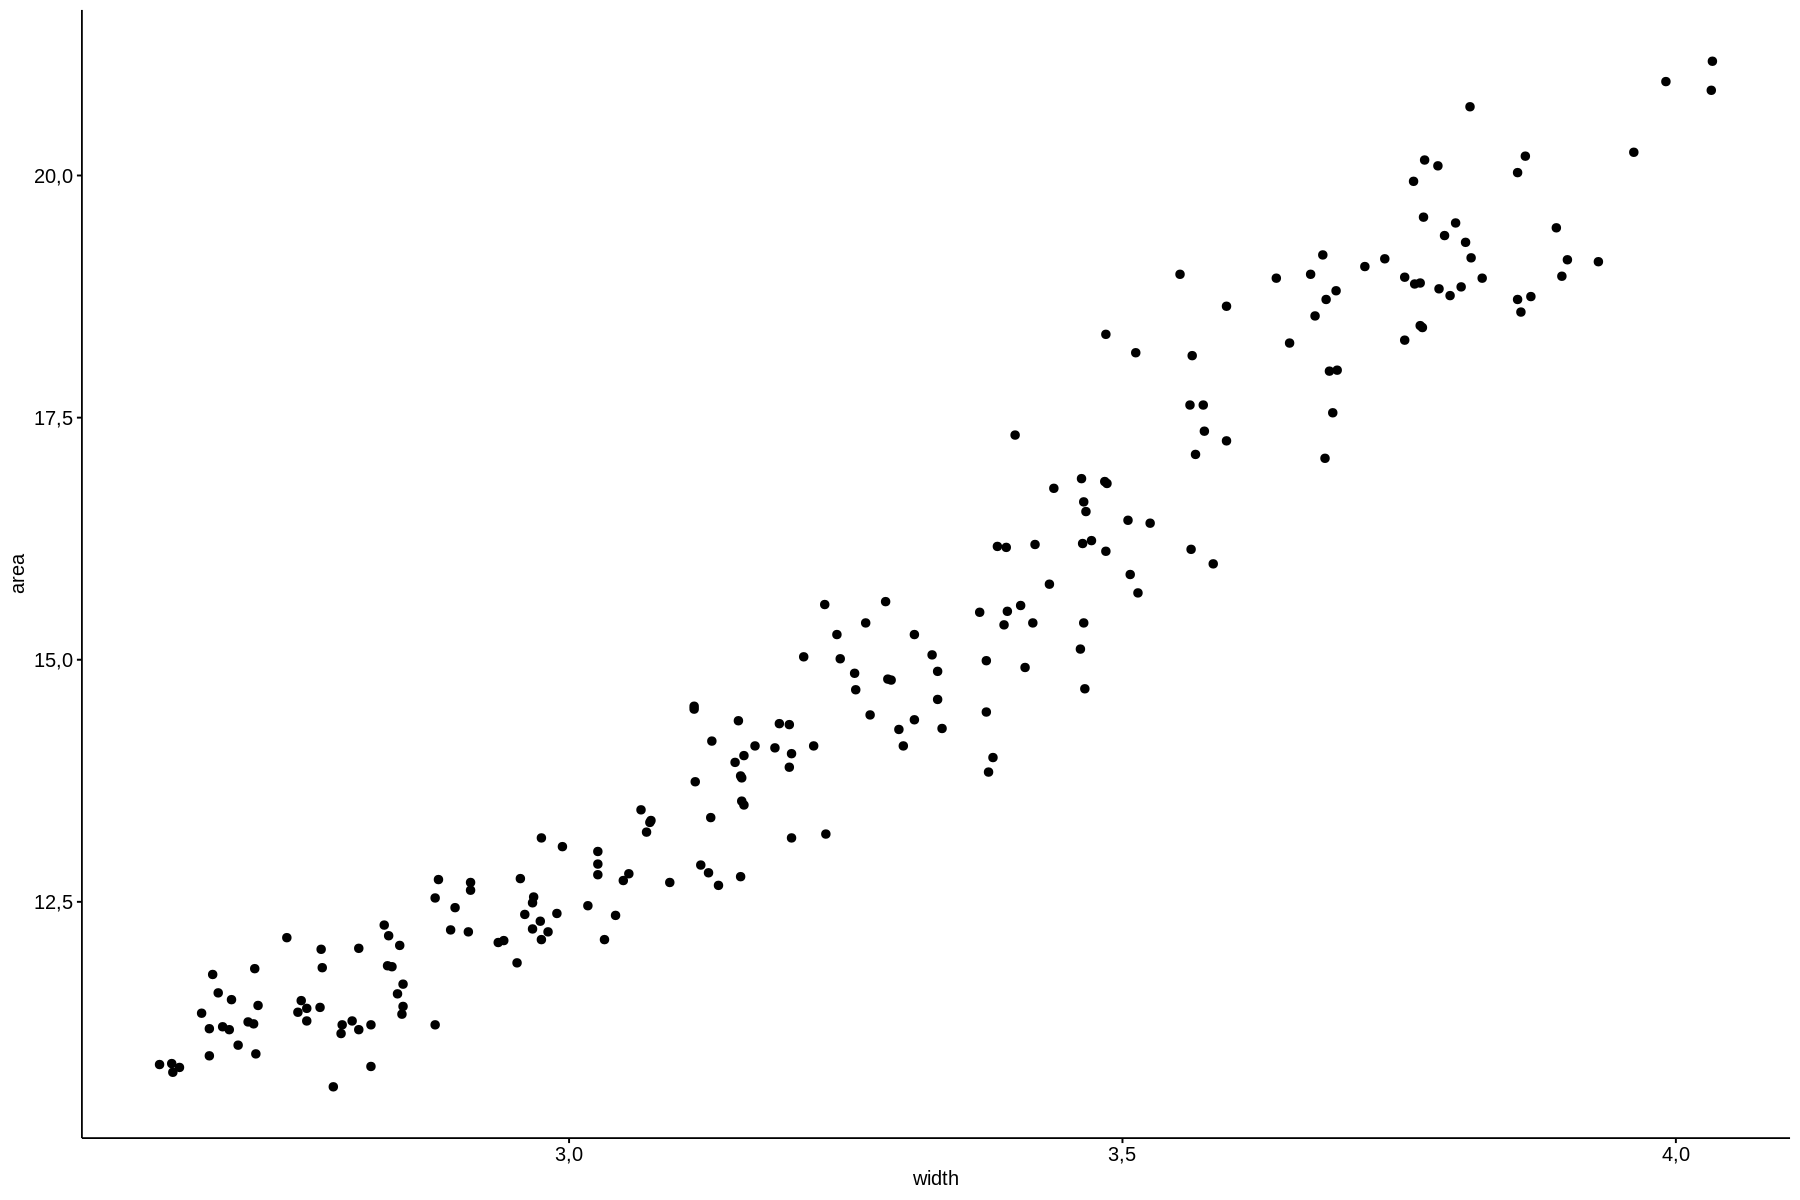

In [13]:
options(repr.plot.width=15, repr.plot.height=10)
ggscatter(seeds, "width", "area")

In [14]:
rl.seeds = lm(area ~ width, seeds)
rl.seeds


Call:
lm(formula = area ~ width, data = seeds)

Coefficients:
(Intercept)        width  
     -9,521        7,478  


In [15]:
summary(rl.seeds)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
lm(formula = area ~ width, data = seeds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1,90787 -0,45022 -0,06557  0,50746  1,93839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9,5212     0,4205  -22,64   <2e-16 ***
width         7,4783     0,1282   58,33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,7 on 208 degrees of freedom
Multiple R-squared:  0,9424,	Adjusted R-squared:  0,9421 
F-statistic:  3403 on 1 and 208 DF,  p-value: < 2,2e-16


In [16]:
area.predict.fome = -9.5212 + 7.4783 * seeds$width
area.predict.bkn = predict(rl.seeds)

In [17]:
head(area.predict.fome)

[1] 15,24693 15,40397 15,43389 15,74798 17,11650 15,24693

In [18]:
head(area.predict.bkn)

1        2        3        4        5        6 
15,24683 15,40387 15,43378 15,74787 17,11640 15,24683

In [19]:
seeds.predictions = data.frame(
    area = c(seeds$area, area.predict.fome), 
    width = c(seeds$width, seeds$width),
    type = c(rep("real", 210), rep("pred", 210)))

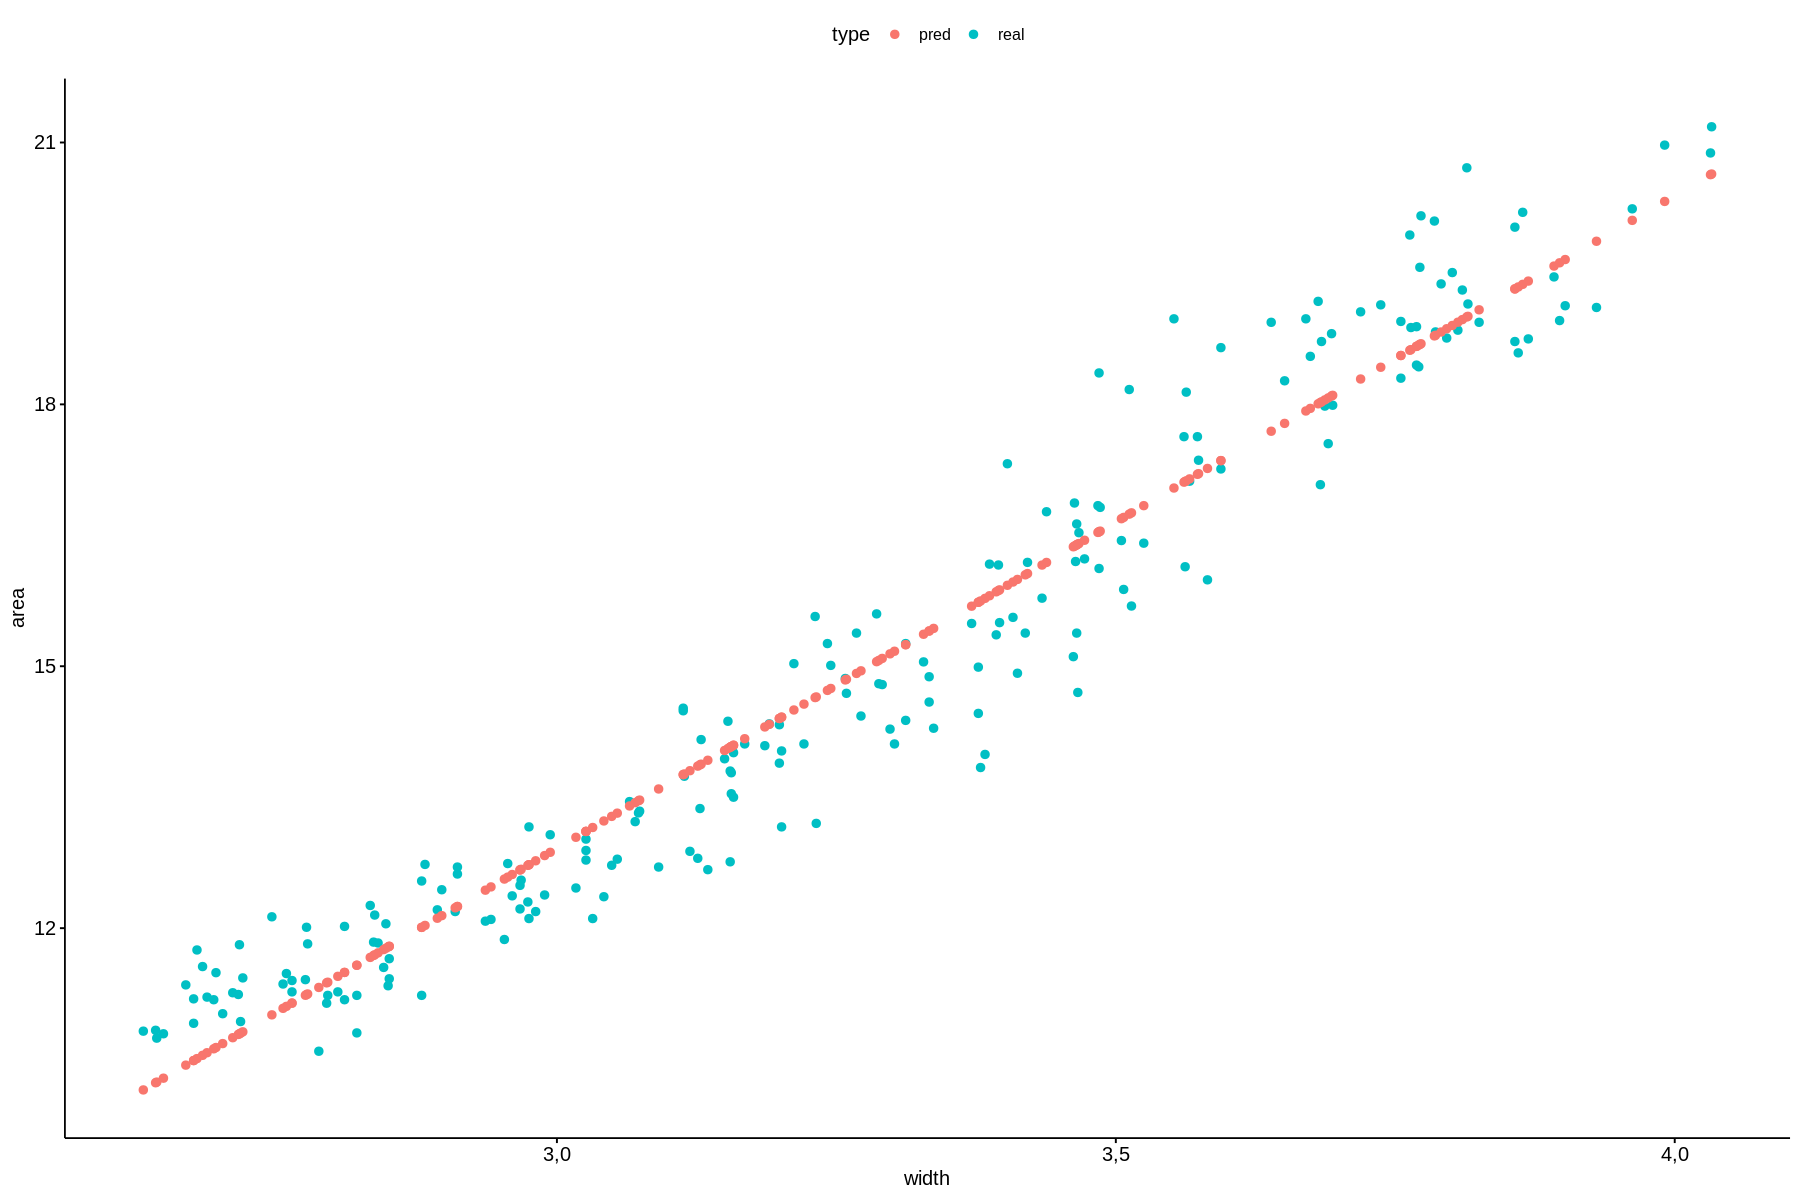

In [20]:
options(repr.plot.width=15, repr.plot.height=10)
ggscatter(seeds.predictions, "width", "area", color="type")

`geom_smooth()` using formula 'y ~ x'



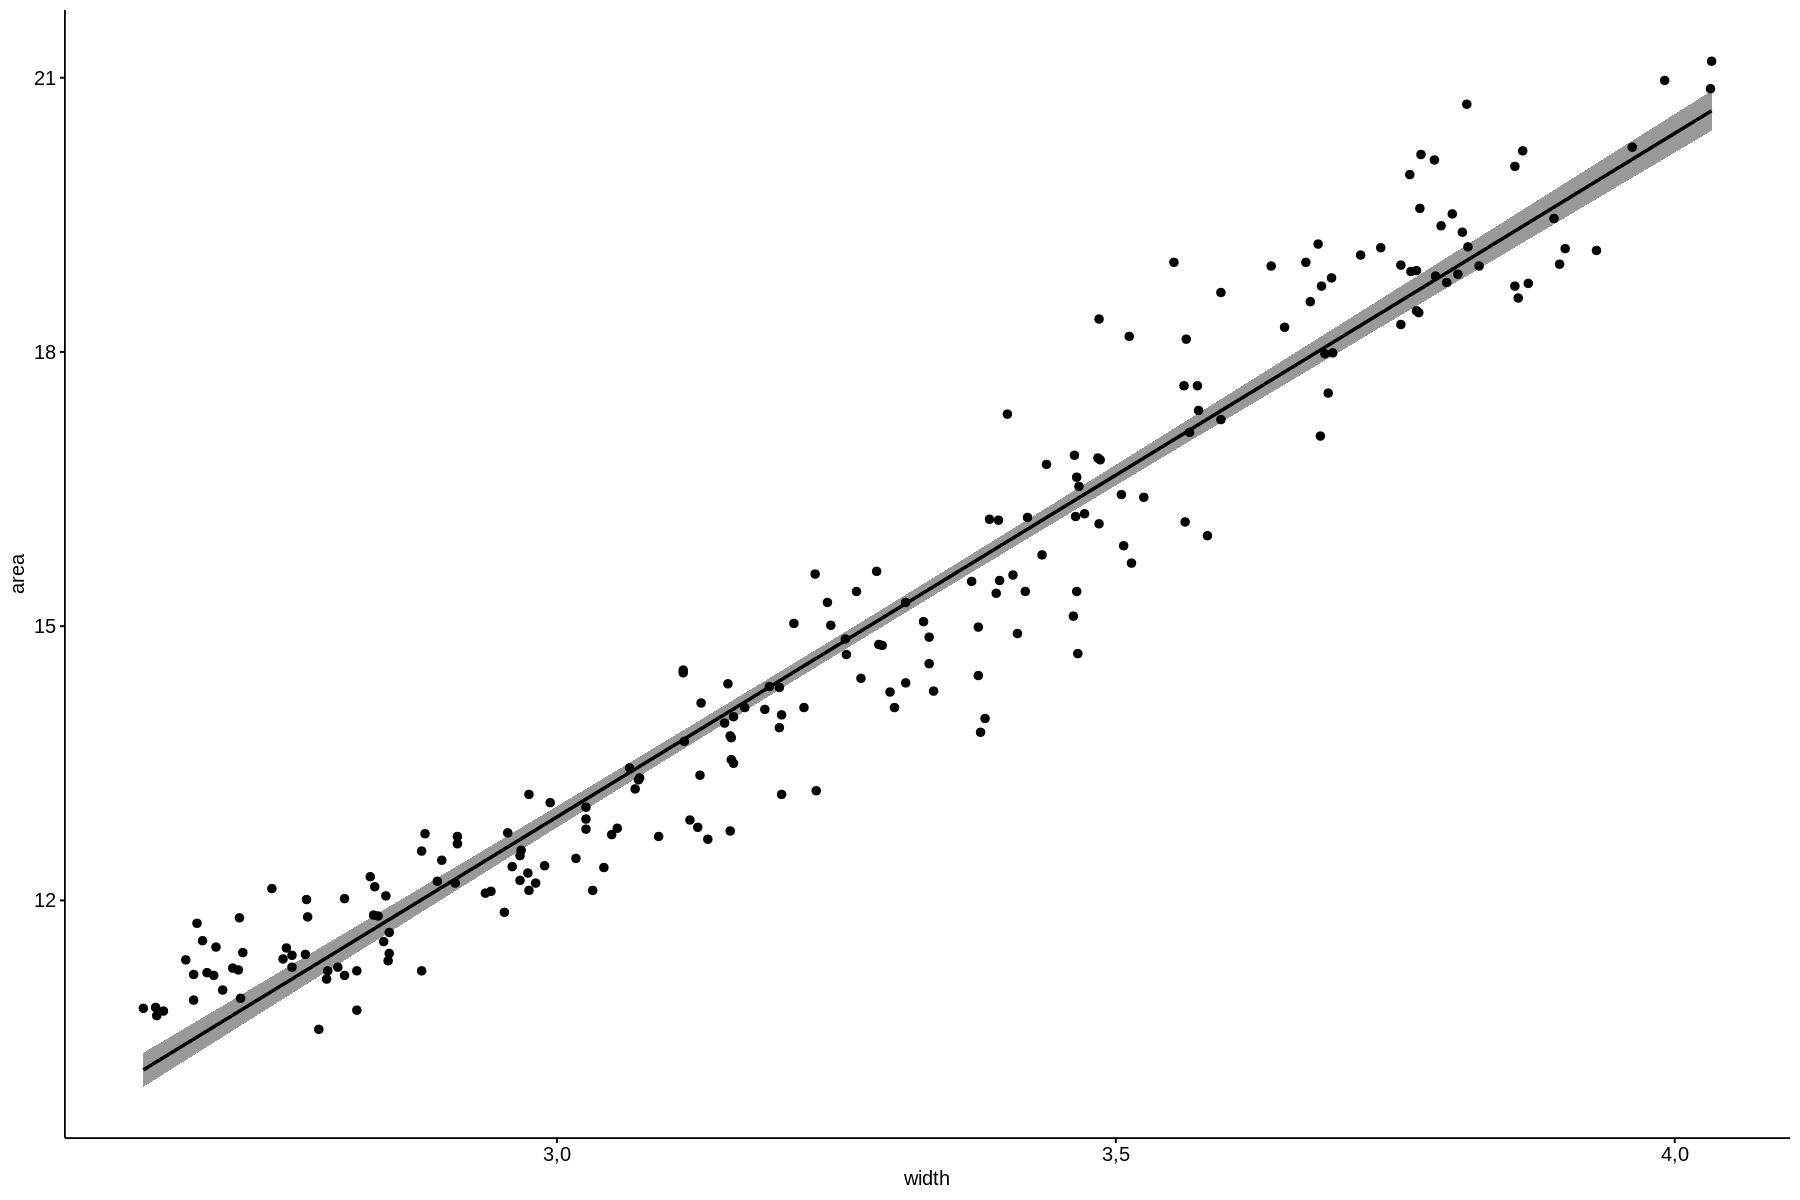

In [21]:
ggscatter(seeds, 
          "width", 
          "area", 
          add = "reg.line",
          conf.int = TRUE)

### Modelos lineales en sus parámetros y en sus entradas

#### Recta

Si $x$ es unidimensional $$ y =\theta_0 + \theta_1 x $$


##### Plano

Si $\vec x =(x_1, x_2)$ es bidimensional $$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

#### Hiperplano

Si $\vec x = (x_1, x_2, \ldots, x_d)$ es d-dimensional $$ y = \theta_0 + \sum_{k=1}^d \theta_k x_k $$

### Regresión logística

El modelo de regresión logística surge del deseo de modelar las probabilidades posteriores de las clases $K$ a través de funciones lineales en $x$, mientras que al mismo tiempo se asegura de que sumen una y permanezcan en $[0, 1]$. Entonces consiste en un métoo para aprender una mapeo entre una o más **variables continuas** (atributos) hacia una **variable binaria** (objetivo).

$$ y_i \leftarrow f_\theta(x_i) = \mathcal{S} \left(\theta_0 + \sum_{j=1}^M \theta_j x_{ij}\right) $$

donde $\mathcal{S}(z) = \frac{1}{1+\exp(-z)} \in [0, 1]$ se conoce como función logística o sigmoid.

Entonces tenemos que:
- $x$ variable independiente, entrada, característica, predictor
- $y$ variable dependiente, salida, respuesta, objetivo (etiqueta)
- $\theta$ son los parámetros del modelo.

#### ¿Cuándo se habla de regresión logística?

- Cuando se tiene un conjunto de $M$ tuplas ($x_i$, $y_i$) $\forall i = 1, 2, 3, ... , M$
- Cuando se realiza un **ajuste** para encontrar el el valor óptimo de $\theta$ en función de los datos.

#### ¿Qué función de costo es apropiada en este caso?

Tipicamente se usa la **Entropía Cruzada Binaria**

$$
L(\theta) = \sum_{i=1}^N  -y_i \log( f_\theta(\vec x_i) ) - (1-y_i) \log(1 - f_\theta(\vec x_i))
$$

#### Sigmoide

$$\mathcal{S}(z) = \frac{1}{1+\exp(-z)}$$

In [22]:
h_1 = function(x, y) { return(-1 + 2*x*y)}
h_2 = function(x, y) { return(0 + 3*x*y)}
h_3 = function(x, y) { return(1 + -(4)*x*y)}
x = c(-6:6)
y = c(rep(0, 6), rep(1, 7))

h = data.frame(x = x,
               y = y,
               h_1 = 1./(1 + exp(-h_1(x, y))), 
               h_2 = 1./(1 + exp(-h_2(x, y))), 
               h_3 = 1./(1 + exp(-h_3(x, y))))

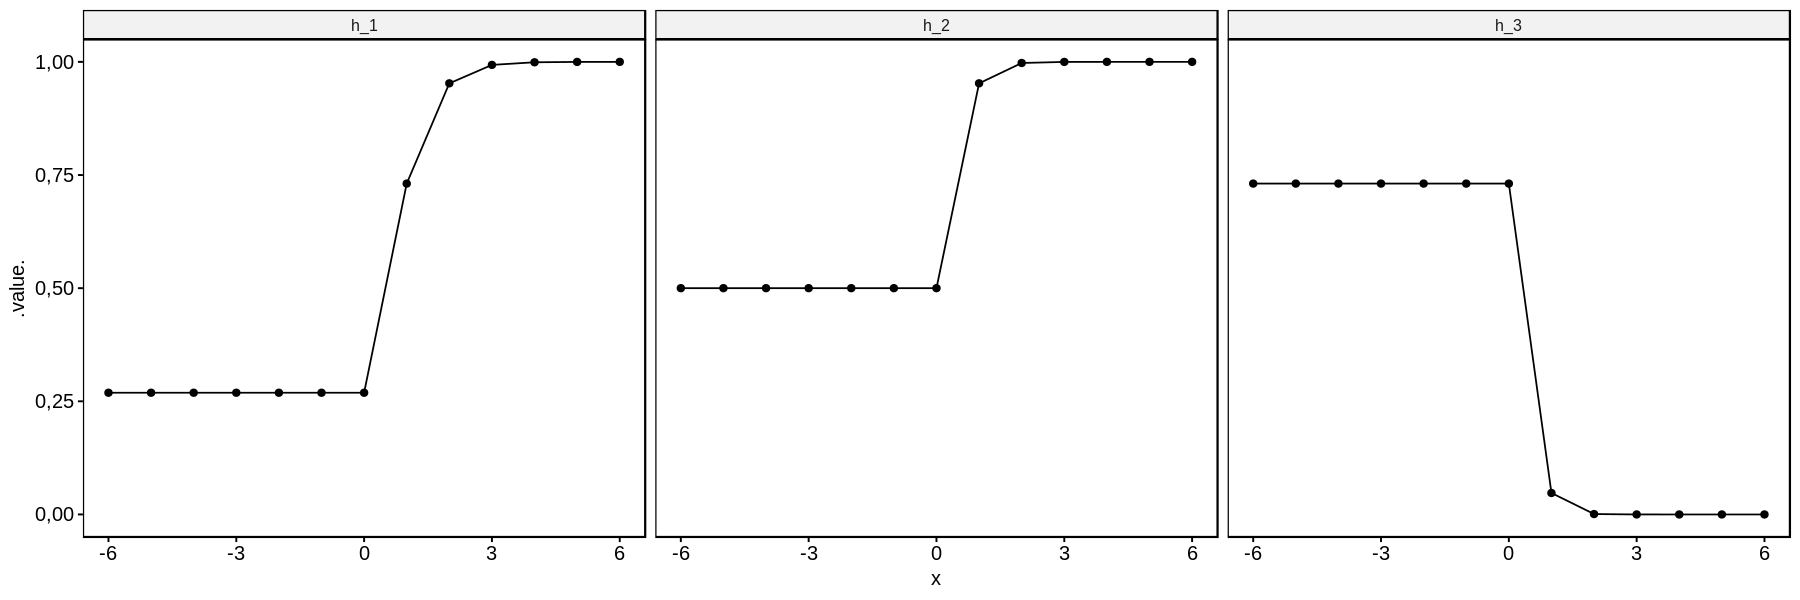

In [23]:
options(repr.plot.width=15, repr.plot.height=5)
ggline(h, 
       "x", 
       y = c("h_1", "h_2", "h_3"), 
       combine=T
      )

#### Ejemplo:
- Saber a que clase pertenecen las semillas respecto a su ancho.

In [24]:
seeds.binary = seeds[seeds$class == "Canadian" | seeds$class == "Rosa", ]
seeds.binary$class_ = as.integer(seeds.binary$class) - 2

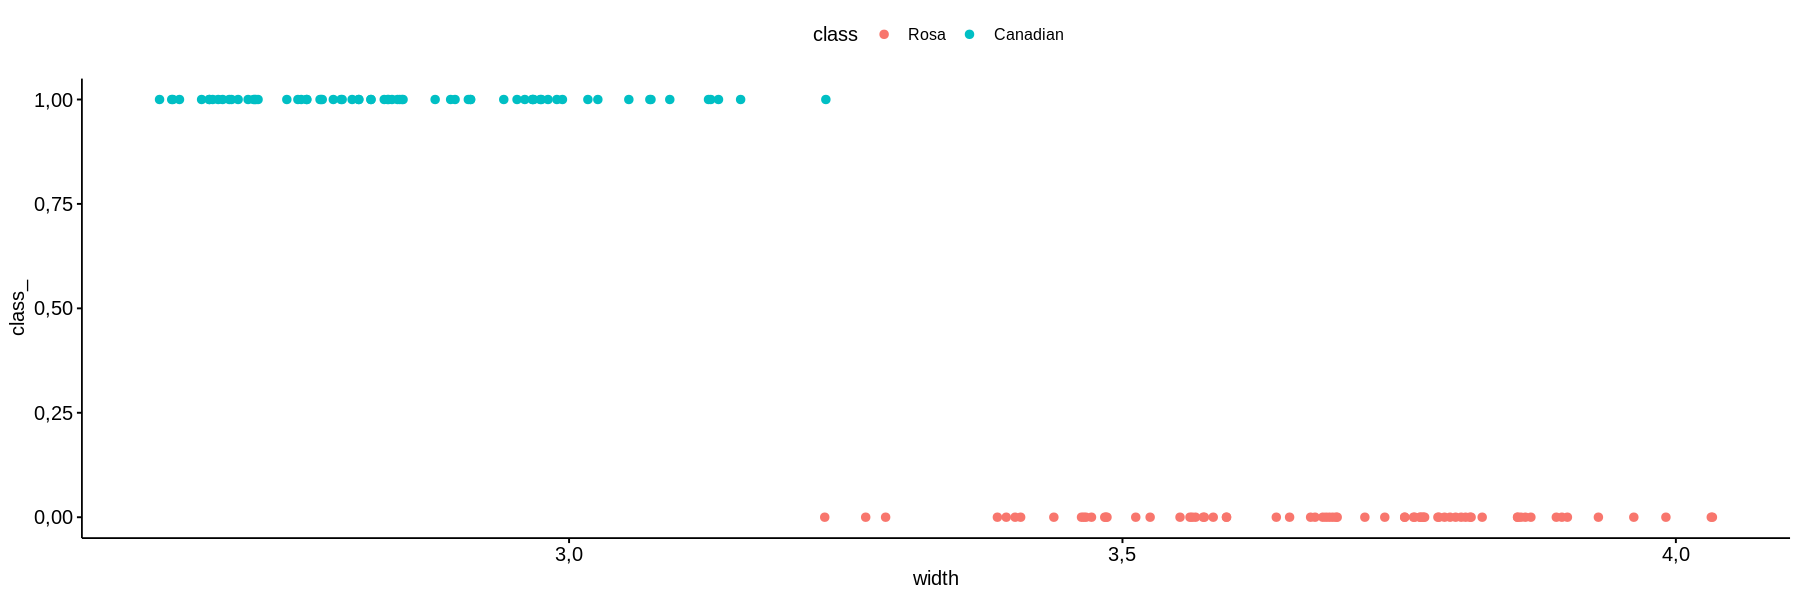

In [25]:
# Esto es justo lo que no hay que hacer
ggscatter(seeds.binary, "width", "class_", color="class")

In [26]:
rlog.seeds = glm(class ~ width, seeds, family = "binomial")
rlog.seeds


Call:  glm(formula = class ~ width, family = "binomial", data = seeds)

Coefficients:
(Intercept)        width  
     0,2117       0,1479  

Degrees of Freedom: 209 Total (i.e. Null);  208 Residual
Null Deviance:	    267,3 
Residual Deviance: 267,2 	AIC: 271,2

In [27]:
summary(rlog.seeds)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”



Call:
glm(formula = class ~ width, family = "binomial", data = seeds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1,5108  -1,4737   0,8767   0,9164   0,9351  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0,2117     1,2741   0,166    0,868
width         0,1479     0,3893   0,380    0,704

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 267,34  on 209  degrees of freedom
Residual deviance: 267,19  on 208  degrees of freedom
AIC: 271,19

Number of Fisher Scoring iterations: 4



### Métricas: Evaluando un clasificador binario

La salida de este clasificador es un valor en el rango $[0, 1]$


- True positives (TP): Es clase (1) y lo clasifico como (1)
- True negative (TN): Es clase (0) y lo clasifico como (0)
- False positives (FP): Es clase (0) y lo clasifico como (1): Error tipo I
- False negative (FN): Es clase (1) y lo clasifico como (0): Error tipo II

A partir de estas métricas se construye la tabla de confusión del clasificador

|Real/Predicho|Positivo| Negativo |
|-|-|-|
| Positivo | TP | FP |
| Negativo | FN | TN |

En base a estas métricas se construyen otras 
$$ \text{Recall} = \frac{TP}{TP + FN} $$ 



> **TPR (Tasa de Verdaderos Positivos):** La proporción de positivos correctamente clasificados respecto al total de positivos. Tambien conocida como $sensitividad$.

$$ \text{FPR} = \frac{FP}{TN + FP} = 1 - \frac{TN}{TN + FP} $$


> **FPR (Tasa de Falsos Positivos)**: La proporción de negativos incorrectamente clasificados respecto al total de negativos. También representada como $1 - especificidad$


$$ \text{Accuracy} = \frac{TP+TN}{TP + FP + FN+ TN} $$

> **Accuracy:** La proporción de ejemplos correctamente clasificados

$$ \text{f1-score} = \frac{2*\text{Recall}*\text{Precision}}{\text{Recall} + \text{Precision}} $$

> **f1-score:** Media armónica entre Recall y Precision asumiendo igual ponderación

**Nota:** Si las clases son desbalanceadas entonces f1-score es más aconsejable que accuracy


### Validación cruzada

Método para conocer como se comportará el el modelo en términos de predicción con datos futuros. 


> ... cross-validation typically estimates well only the expected prediction error. (Pág. 241. The Elements of Statistical Learning)


![cv](https://4.bp.blogspot.com/-rtu5FnXZPBM/VFgRiSfR4aI/AAAAAAAABOA/SI2cawyRCuc/s1600/validacioncruzada_5.jpg)


### Resumen y más

Un modelo con más parámetros es más flexible pero también más complejo

> Complejidad: grados de libertad de un modelo

Un exceso de flexibilidad no es bueno. Podría ocurrir que el modelo se ajuste al ruido

> Sobreajuste: Ocurre cuando el modelo "memoriza" los datos

Cuando esto ocurre el modelo pierde capacidad de generalización

> Generalización: Capacidad de predecir adecuadamente datos no usados en el ajuste

Tres maneras de evitar el sobreajuste y mejorar la capacidad de generalización

- Usar modelos de baja complejidad
- Escoger la complejidad mediante pruebas de validación
- Usar **regularización**

